In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Social_Network_Ads.csv", usecols=['Age', 'EstimatedSalary_K', 'Purchased'])

In [5]:
data.head()

,Age,EstimatedSalary_K,Purchased
0,19,19,0
1,35,20,0
2,26,43,0
3,27,57,0
4,19,76,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                400 non-null    int64
 1   EstimatedSalary_K  400 non-null    int64
 2   Purchased          400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
data.describe()

,Age,EstimatedSalary_K,Purchased
count,400.000000,400.00000,400.000000
mean,37.655000,69.74250,0.357500
std,10.482877,34.09696,0.479864
min,18.000000,15.00000,0.000000
25%,29.750000,43.00000,0.000000
50%,37.000000,70.00000,0.000000
75%,46.000000,88.00000,1.000000
max,60.000000,150.00000,1.000000


In [37]:
data.isnull().any()

Age                  False
EstimatedSalary_K    False
Purchased            False
dtype: bool

In [7]:
data.shape

(400, 3)

In [9]:
X = data[['Age', 'EstimatedSalary_K']]
y = data['Purchased']

In [10]:
#Chia du lieu

In [11]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
#Chuan bi model

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

[-10.90617097]
[[0.19760279 0.03312442]]


In [29]:
#Danh gia mo hinh
#  Đánh giá score 
print('Train accuracy score: ', model.score(X_train,y_train))
print('Test accuracy  score: ', model.score(X_test,y_test))

Train accuracy score:  0.8321428571428572
Test accuracy  score:  0.85


In [30]:
#  Sử dụng các đại lượng khác đánh giá tập test 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred)
print(score, recall, precision, f1)

0.85 0.8160886039055668 0.877742946708464 0.775


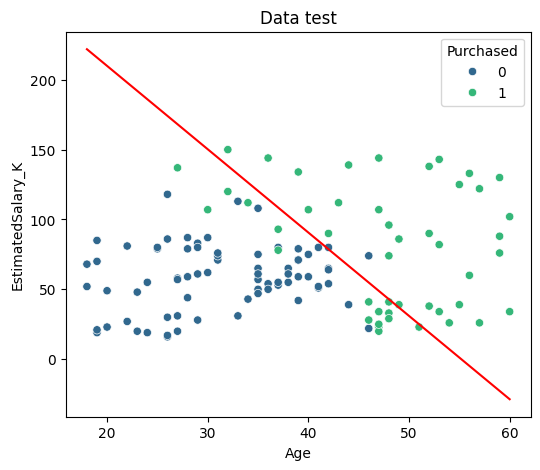

In [31]:
# Visualize_data(X_test.Age,X_test.EstimatedSalary_K,Y_test,'Data test')
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_test.Age, y=X_test.EstimatedSalary_K, hue=y_test, palette="viridis")

x0=np.min(X_test.Age)
x1=np.max(X_test.Age)
y0=-(model.intercept_ + x0*model.coef_[0][0])/model.coef_[0][1]
y1=-(model.intercept_ + x1*model.coef_[0][0])/model.coef_[0][1]
plt.plot([x0,x1],[y0,y1],'r')

plt.title('Data test')
plt.show()

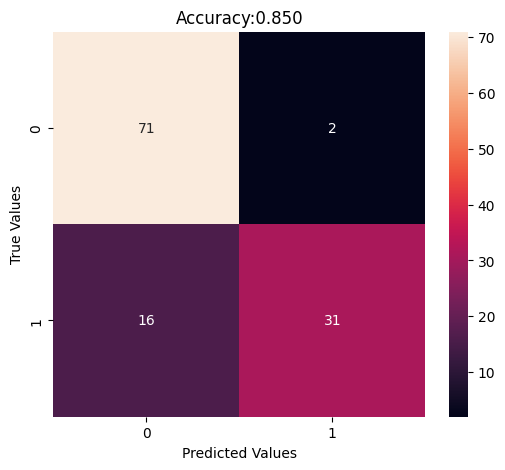

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
#   Vẽ confusion Matrix và nhận xét trên tập test
cm = confusion_matrix(y_test, model.predict(X_test))
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Accuracy:{0:.3f}'.format(score))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

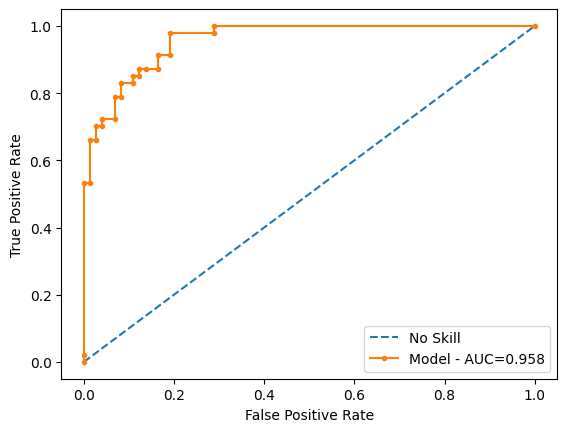

In [33]:
#  Vẽ ROC_AUC và nhận xét kết quả trên tập test
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)[:,1]

# calculate roc curves
fpr, tpr, threshold = roc_curve(y_test, y_prob)

# calculate scores
model_auc = roc_auc_score(y_test, y_prob)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill' )
plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' %(model_auc))
# show axis labels and the legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

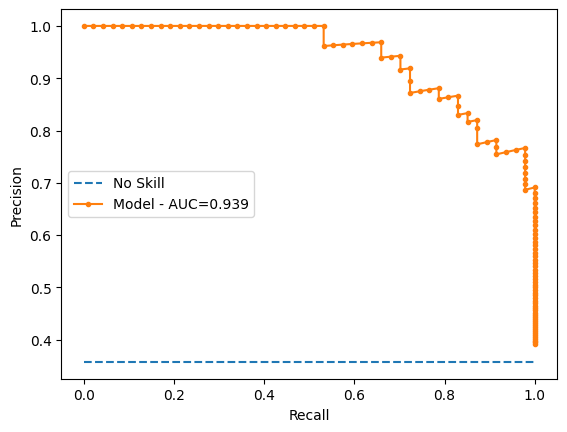

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# calculate roc curves
y_prob = model.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_prob)
# calculate scores
model_auc = auc(recall, precision)
# plot the roc curve for the model
ns=len(y[y==1]) / len(y)
plt.plot([0,1], [ns,ns], linestyle='--', label='No Skill' )
plt.plot(recall, precision, marker='.', label='Model - AUC=%.3f' %  (model_auc))

# show axis labels and the legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [35]:
# Hieu ve chinh nguong

In [36]:
y_proba = model.predict_proba(X_test)[:,1]
y_proba = model.predict_proba(X_test)[:,1]
y_proba

array([0.25205063, 0.97509199, 0.01953502, 0.85304767, 0.01408852,
       0.05096177, 0.8727475 , 0.08118433, 0.37338367, 0.38846561,
       0.13740813, 0.66663557, 0.00839795, 0.00204104, 0.10946058,
       0.3982802 , 0.65201362, 0.65356899, 0.14082719, 0.89539283,
       0.00345473, 0.07407353, 0.29797109, 0.96337986, 0.00146805,
       0.48336441, 0.51077327, 0.13713724, 0.9837381 , 0.00156844,
       0.38737937, 0.00789963, 0.72660109, 0.05972264, 0.63233647,
       0.1815707 , 0.14516658, 0.22370963, 0.00836942, 0.00607874,
       0.41869542, 0.01284515, 0.00358698, 0.27760931, 0.00481583,
       0.9162648 , 0.04089077, 0.08101386, 0.48422129, 0.05933844,
       0.03391901, 0.90745755, 0.17144483, 0.03502136, 0.27990876,
       0.01051857, 0.98698673, 0.13472437, 0.08872706, 0.09423155,
       0.24691924, 0.10890439, 0.91296378, 0.07645844, 0.03170839,
       0.26253188, 0.5925082 , 0.95895111, 0.22351108, 0.34474496,
       0.98092924, 0.01291786, 0.02534062, 0.00333874, 0.37927

In [23]:

y_predict = y_proba >= 0.45
y_predict

array([False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False])

In [24]:
# calculate roc curves
precision, recall, threshold = precision_recall_curve(y_test, y_prob)

scores= (2 * precision * recall)/(precision + recall) 
pos= np.argmax(scores)
print(threshold[pos],scores[pos])

0.26117520754453677 0.8571428571428571


In [25]:
scores = []
thresholds = []
y_proba = model.predict_proba(X_test)[:,1]
for threshold in np.arange(0,1,0.05):
    y_pred = (y_proba >= threshold)
    scores.append(f1_score(y_test, y_pred))
    thresholds.append(threshold)
print(scores)

[0.5964912280701754, 0.723404255319149, 0.7555555555555555, 0.796875, 0.8099173553719008, 0.8495575221238938, 0.8518518518518519, 0.8490566037735849, 0.8080808080808081, 0.7956989247311828, 0.7555555555555555, 0.6976744186046512, 0.6506024096385542, 0.6341463414634146, 0.6172839506172839, 0.6172839506172839, 0.5641025641025641, 0.5135135135135135, 0.43478260869565216, 0.26229508196721313]
